In [ ]:
#Assignment1
#The largest number in a list

#Enter the list
list=[]
n=int(input("enter the number of elements in the desired list: "))#the number of elements in the list

for i in range(0,n):
  element=int(input("enter the element here: "))#the value of element
  list.append(element)

print("the list is",list)

#Finding the largest
largest=list[0]
for i in list:
    if i > largest:
        largest=i
print("the largest element in the list is",largest)

enter the number of elements in the desired list: 3
enter the element here: 3
enter the element here: 5
enter the element here: 4
the list is [3, 5, 4]
the largest element in the list is 5


In [ ]:
#Assignment2
#Inheritance programme-add array

#Build the algorithm
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

  def printname(self):
    print(self.name, self.age)

#Add matric information in the array
class Student(Person):
  def __init__(self, name, age, matric):
    super().__init__(name, age)
    self.matric = matric

#Print the outcome
x = Student("Hasri", 24, 1816555)
print("The Matric Number Is ",x.matric)


The Matric Number Is  1816555


<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


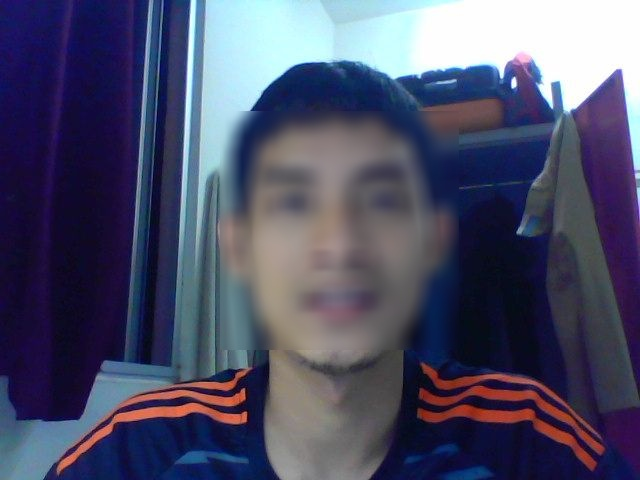

<IPython.core.display.Javascript object>

In [ ]:
#Assignment3
#Blur the face detection

# import the libraries needed
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

#Function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  #Decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  #Convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  #Decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

#Function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  #Convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  #Format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  #Format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

#Initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  #Get photo data
  data = eval_js('takePhoto({})'.format(quality))
  #Get OpenCV format image
  img = js_to_image(data)
  #Apply blur on the image
  blurred_img=cv2.blur(img, (20,20))
  #Grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  #Get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  
  #Draw face bounding box on image
  for (x,y,w,h) in faces:
      mask = np.zeros((480, 640, 3), dtype=np.uint8)
      mask = cv2.rectangle(mask,(x,y),(x+w,y+h),(255,255,255),-1)
  #Overlapping mask with blurred image with img as background
      out = np.where(mask==np.array([255,255,255]), blurred_img, img)
  
  #Save image
  cv2.imwrite(filename, out)

  return filename

i=0 #To obtain 3 pictures at different time
while i<3:
  try:
    filename = take_photo('photo.jpg')
    print('Saved to {}'.format(filename))
  
   #Show the image which was just taken.
    display(Image(filename))
  
  except Exception as err:
  #Errors will be thrown if the user does not have a webcam or if they do not
  #Grant the page permission to access it.
    print(str(err))
  i+=1